# **Aneesh Krishna Ramesh - 8914620**
---

In [483]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plot
import seaborn as sb

import sklearn.datasets as datasets
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 


## **Data Insights -  Characteristics of the data**
* Total data : 442 diabetes patients were surveyed
* Total variables : 10 unique attributes were surveyed 
    * age age in years
    * sex
    * bmi body mass index
    * bp average blood pressure
    * s1 - total serum cholesterol
    * s2 - low-density lipoproteins
    * s3 - high-density lipoproteins
    * s4 - total cholesterol / HDL
    * s5 - possibly log of serum triglycerides level
    * s6 - blood sugar level


In [484]:
diabetes_x, diabetes_y =  datasets.load_diabetes(return_X_y=True, as_frame=False)

## **Patient Data with the attributes**

In [485]:
dataFrame = pd.DataFrame(diabetes_x,columns= datasets.load_diabetes()["feature_names"])
dataFrame

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [486]:
diabetes_df = pd.DataFrame(diabetes_x, columns=datasets.load_diabetes().feature_names)
diabetes_df['target'] = diabetes_y

### **Correlation between the features can be shown as below**

In [487]:
diabetes_df.describe()
diabetes_df.corr()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


### **Annotated correlation chart using Seaborn**

<Axes: >

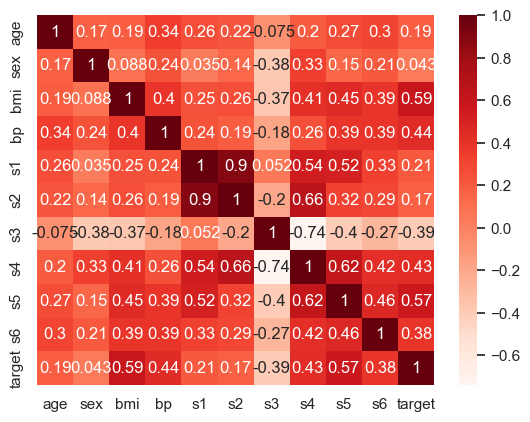

In [488]:
sb.heatmap(diabetes_df.corr(),cmap="Reds",annot=True)

the plot above indicates that the BMI and diabetes progression have the highest co-relation. 
A value of 0.59 can be observed between BMI and target ( in the X and the Y Axis of the graph above ). 

We shall now plot the relation between these features with the target to see specifically how BMI relates to the target

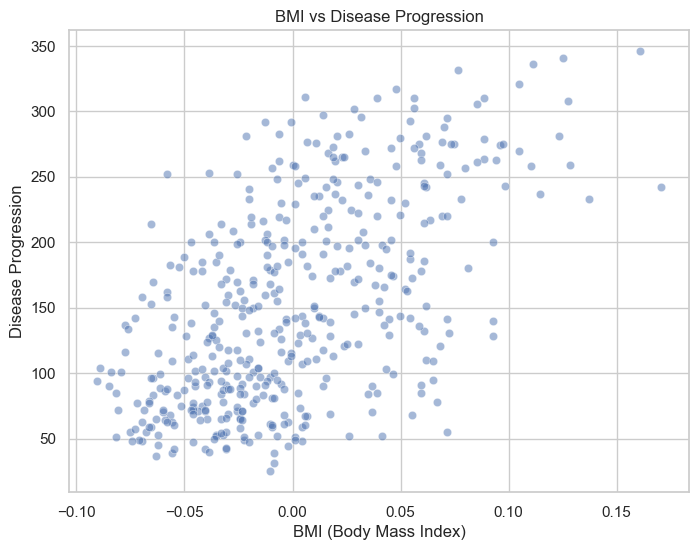

In [489]:
dataFrame['Disease Progression'] = diabetes_y
plot.figure(figsize=(8, 6))
sb.scatterplot(data=dataFrame, x='bmi', y='Disease Progression', alpha=0.5)
plot.xlabel('BMI (Body Mass Index)')
plot.ylabel('Disease Progression')
plot.title('BMI vs Disease Progression')
plot.show()

In [495]:
diabetes_X = diabetes_x[:, np.newaxis, 2]
diabetes_y = diabetes_df["target"]
X_train, X_test, y_train, y_test = train_test_split(diabetes_X, diabetes_y, test_size=0.6, random_state=0)

## **Building, Splitting and Running the Model**

In [496]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

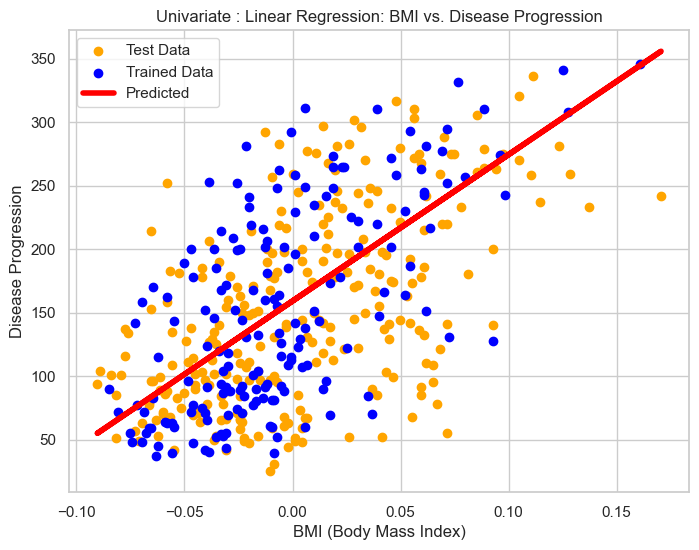

In [499]:
plot.figure(figsize=(8, 6))
plot.scatter(X_test, y_test, color='orange', label='Test Data')
plot.scatter(X_train, y_train, color='blue', label='Trained Data')
plot.plot(X_test, y_pred, color='red', linewidth=4, label='Predicted')
plot.xlabel('BMI (Body Mass Index)')
plot.ylabel('Disease Progression')
plot.title('Univariate : Linear Regression: BMI vs. Disease Progression')
plot.legend()
plot.show()


In [508]:
print("Model Parameters : ")
print("Coefficients : %.2f" % model.coef_[0])
print("Intercept: %.2f" % model.intercept_,"\n")

mse_test = metrics.mean_squared_error(y_test, y_pred)
mse_train = metrics.mean_squared_error(y_train, y_pred = model.predict(X_train))


mae_test = metrics.mean_absolute_error(y_test, y_pred)
mae_train = metrics.mean_absolute_error(y_train, y_pred = model.predict(X_train))


print(f"Mean Absolute Error (Train) : {mae_train:.2f}")
print(f"Mean Absolute Error (Test)  : {mae_test:.2f}","\n")

print(f"Mean Squared Error (Train) : {mse_train:.2f}")
print(f"Mean Squared Error (Test)  : {mse_test:.2f}")

Model Parameters : 
Coefficients : 1153.66
Intercept: 159.10 

Mean Absolute Error (Train) : 51.47
Mean Absolute Error (Test)  : 52.31 

Mean Squared Error (Train) : 3765.75
Mean Squared Error (Test)  : 4210.38


## **Observation** : 
We have Mean Absolute error which means that the model is not functioning effectively. 
Linear regression is not for this data as the data is too dispersed  